## Import Libraries

Before we start writing any Python code, we need to bring in some libraries that will provide us with pre-written code to perform specific tasks. For our project, we'll be importing the necessary libraries that will help us in developing our model.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import textwrap
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid

import joblib

from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    roc_auc_score, 
    precision_recall_fscore_support
)

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format

sns.set_style('dark')
%matplotlib inline

## Reading Dataset

To begin our analysis, we'll import the dataset from the 'data.csv' file into our Python environment. Once the data is loaded, we'll use some simple yet powerful functions from the pandas library to explore and understand the dataset better. 

In [3]:
data = pd.read_csv('dataset/data.csv')
data.shape

(1599, 12)

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


Using the info() method in Python to check for any missing or null values and the data types of each column in the dataset. We can see that there are no missing values and the data types are correct.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Using the describe() method, we can easily get a summary of the numerical attributes of our data. This includes the count, or how many values there are in each column, as well as the mean, or the average value. We can also see the standard deviation, which tells us how spread out the values are from the mean. Additionally, we can view the minimum, 25th percentile, median, 75th percentile, and maximum values of each column. This gives us a quick overview of the data and helps us understand the range of values in each column.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000,8.320,1.741,4.600,7.100,7.900,9.200,15.900
volatile acidity,1599.000,0.528,0.179,0.120,0.390,0.520,0.640,1.580
citric acid,1599.000,0.271,0.195,0.000,0.090,0.260,0.420,1.000
residual sugar,1599.000,2.539,1.410,0.900,1.900,2.200,2.600,15.500
chlorides,1599.000,0.087,0.047,0.012,0.070,0.079,0.090,0.611
free sulfur dioxide,1599.000,15.875,10.460,1.000,7.000,14.000,21.000,72.000
total sulfur dioxide,1599.000,46.468,32.895,6.000,22.000,38.000,62.000,289.000
density,1599.000,0.997,0.002,0.990,0.996,0.997,0.998,1.004
pH,1599.000,3.311,0.154,2.740,3.210,3.310,3.400,4.010
sulphates,1599.000,0.658,0.170,0.330,0.550,0.620,0.730,2.000


We are changing the names of the columns in our data table to make them easier to understand and follow a consistent naming convention.

In [7]:
data = data.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
})

data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


## EDA

In [8]:
def get_count_plot(data: pd.DataFrame, column_name: str) -> None:
    plt.style.use('fivethirtyeight')
    bar_color = ['#4878d0', '#ee854a', '#6acc64', '#d65f5f', '#956cb4', 
                '#8c613c', '#dc7ec0', '#797979', '#d5bb67', '#82c6e2']
    
    column_data = data[column_name].value_counts().sort_index(ascending = True)
    column_plot = plt.barh(y = column_data.index, width = column_data.values,
                            color = bar_color)

    for bar in column_plot:
        plt.text(bar.get_height() + bar.get_width() + 30, bar.get_y() + 0.5, bar.get_width(), horizontalalignment = 'center')
        
    axes_subplot = plt.subplot()
    axes_subplot.invert_yaxis()
    plt.yticks(column_data.index)
    plt.xticks([])
    plt.title('Count of Wine Quality Ratings')
    plt.ylabel('Quality Rating')
    plt.xlabel('No. of Wines')
    plt.grid(False)


def get_barplot(data: pd.DataFrame, x_column: str, y_column: str, x_label: str, y_label: str, title: str) -> None:

    plt.figure(figsize = (10, 6))
    
    bar_plot = sns.barplot(
        data = data, 
        x = x_column, 
        y = y_column, 
        edgecolor = 'black', 
        linewidth = 2, 
        palette = 'colorblind',
    )
    
    bar_plot.set_xticklabels(textwrap.fill(name.get_text(), width = 10) for name in bar_plot.get_xticklabels())
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontdict = {'fontsize' : 12, 'color' : 'black'})
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(False)


def get_numerical_plot(data: pd.DataFrame, column_name: str) -> None:
    fig, ax = plt.subplots(3, 1, figsize=(11, 8))

    g1 = sns.histplot(x=column_name, data=data, ax=ax[0], kde=True)
    ax[0].set_title(f'Histogram and Distribution - {column_name}')
    g1.ticklabel_format(style='plain', axis='x')
    g1.set(xlabel=None)

    g2 = sns.boxplot(x=column_name, data=data, ax=ax[1])
    ax[1].set_title('Boxplot')
    g2.ticklabel_format(style='plain', axis='x')
    g2.set(xlabel=None)

    g3 = sns.violinplot(x=column_name, data=data, ax=ax[2])
    ax[2].set_title('Violinplot')
    g3.ticklabel_format(style='plain', axis='x')
    g3.set(xlabel=None)
    
    plt.tight_layout()
    plt.show()

To better understand the distribution of the quality ratings, we can create a visualization called "count plot". Interestingly, we can observe that there are 18 wines that have received the highest quality rating of 8. 

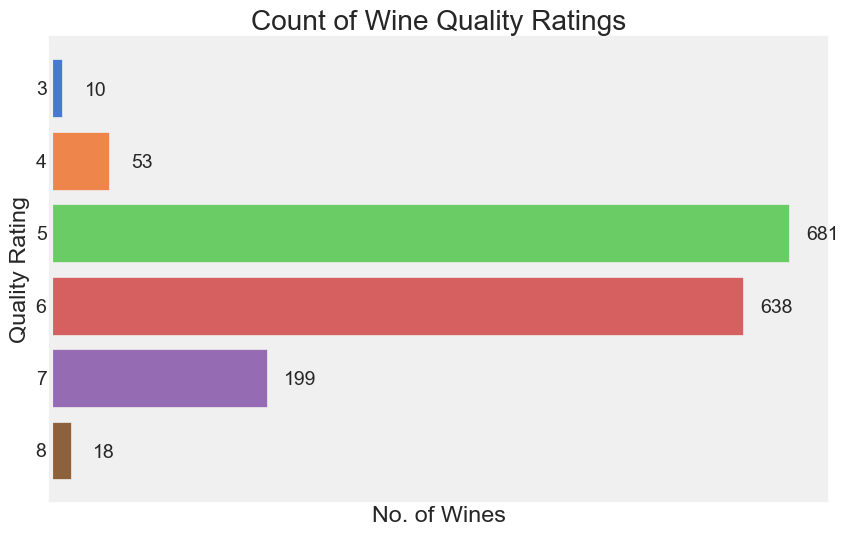

In [9]:
plt.figure(figsize = (10, 6))
get_count_plot(data, 'quality')
plt.show()

The bar graph shows that the fixed acidity level does not seem to be a reliable indicator of wine quality. We can see that wines with different quality ratings have similar fixed acidity values, and there is no clear pattern or trend that suggests higher or lower fixed acidity leads to better or worse quality wines.

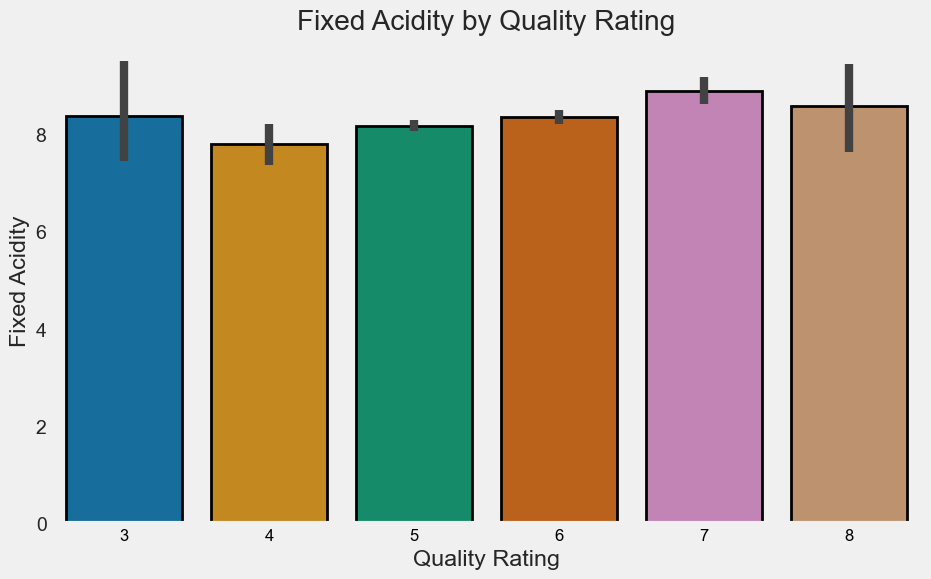

In [10]:
get_barplot(
    data = data, 
    x_column = 'quality', 
    y_column = 'fixed_acidity',
    x_label = 'Quality Rating',
    y_label = 'Fixed Acidity',
    title = 'Fixed Acidity by Quality Rating'
)

plt.show()

The bar graph clearly shows that wines with lower quality ratings tend to have higher levels of volatile acidity, which is an undesirable trait. As the quality of the wine improves, the volatile acidity levels decrease, indicating a better and more desirable taste profile.

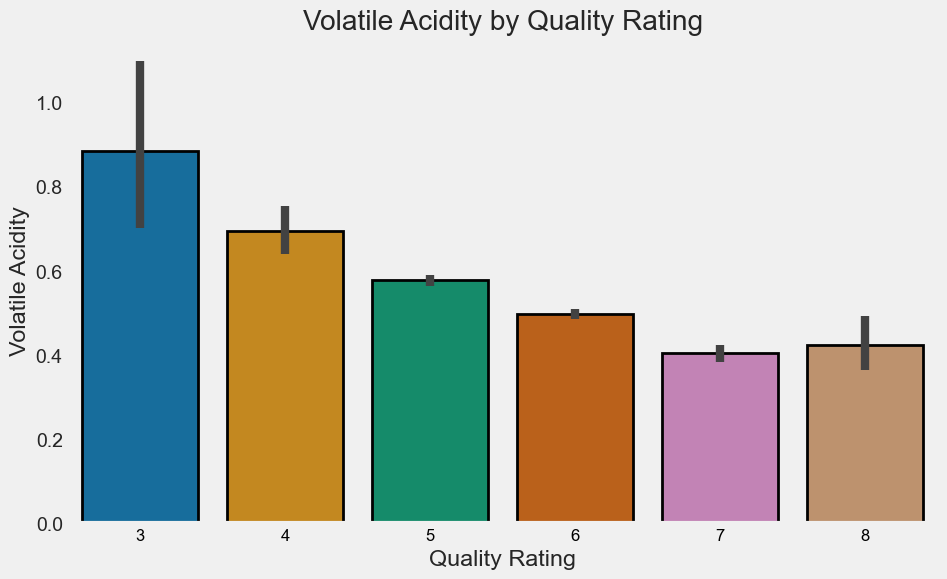

In [11]:
get_barplot(
    data = data, 
    x_column = 'quality', 
    y_column = 'volatile_acidity',
    x_label = 'Quality Rating',
    y_label = 'Volatile Acidity',
    title = 'Volatile Acidity by Quality Rating'
)

plt.show()

The bar graph shows that wines with higher levels of citric acid tend to have better quality ratings. As the amount of citric acid in the wine increases, the overall quality score also goes up. There's a positive correlation between citric acid content and wine quality.

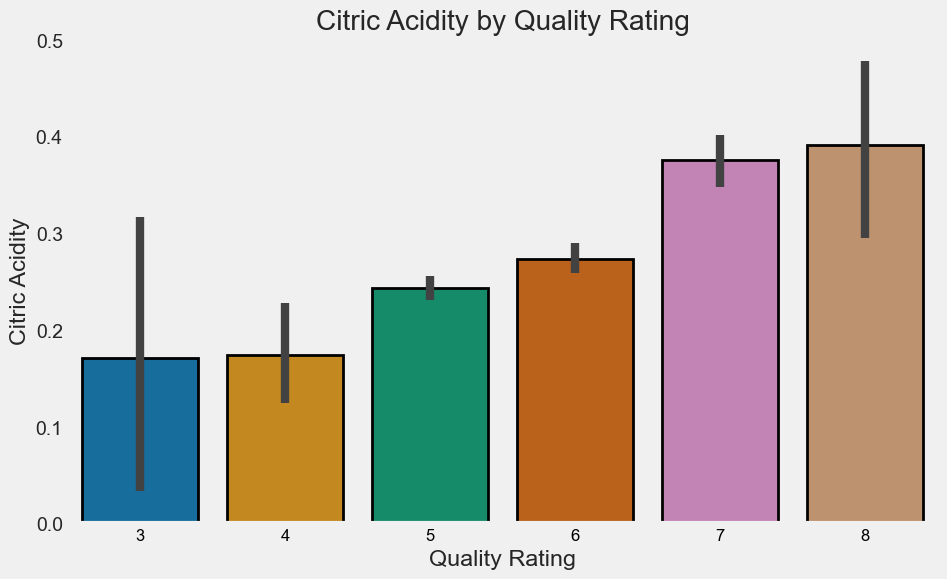

In [12]:
get_barplot(
    data = data, 
    x_column = 'quality', 
    y_column = 'citric_acid',
    x_label = 'Quality Rating',
    y_label = 'Citric Acidity',
    title = 'Citric Acidity by Quality Rating'
)

plt.show()

The bar chart shows that the amount of residual sugar (the sugar left after fermentation) is similar across all quality ratings for the wines. This suggests that the residual sugar level does not play a major role in determining the overall quality of a wine.

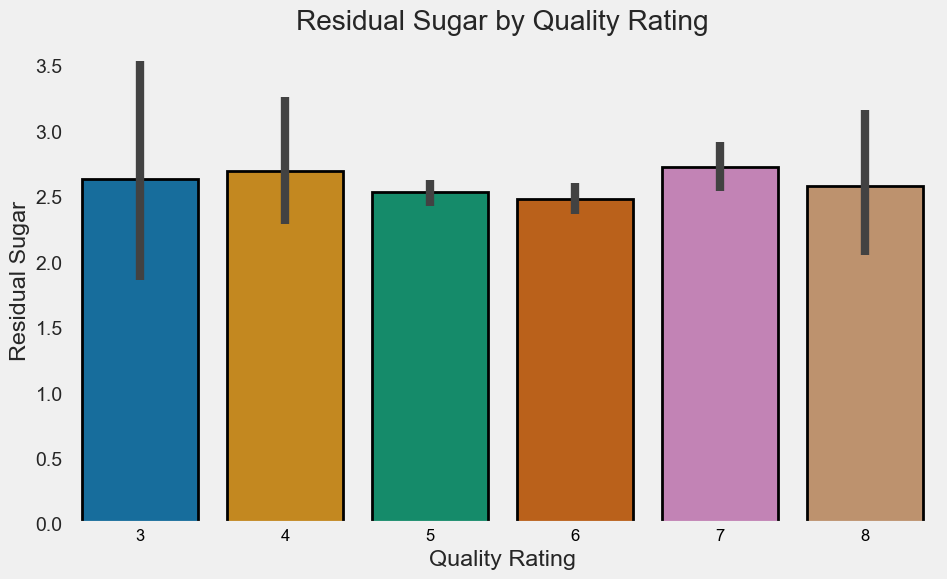

In [13]:
get_barplot(
    data = data, 
    x_column = 'quality', 
    y_column = 'residual_sugar',
    x_label = 'Quality Rating',
    y_label = 'Residual Sugar',
    title = 'Residual Sugar by Quality Rating'
)

plt.show()

The bar graph shows that wines with lower quality tend to have higher levels of chlorides. This suggests that the amount of chlorides present can serve as a useful indicator of a wine's quality. Wines with lower chloride levels tend to be of higher quality. Generally, the higher the chloride content, the lower the quality of the wine.

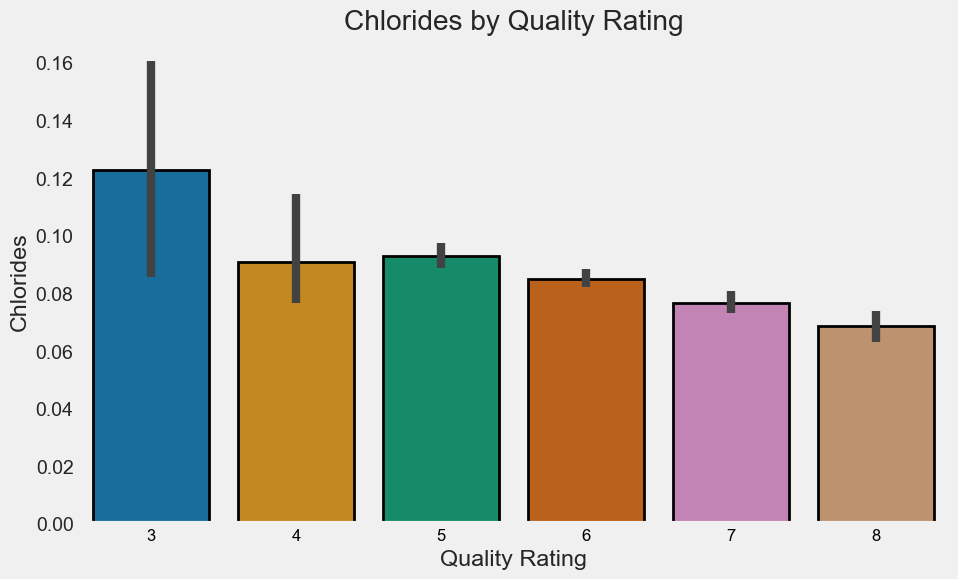

In [14]:
get_barplot(
    data = data, 
    x_column = 'quality', 
    y_column = 'chlorides',
    x_label = 'Quality Rating',
    y_label = 'Chlorides',
    title = 'Chlorides by Quality Rating'
)

plt.show()

The bar plot shows that wines with quality ratings of 5 and 6 tend to have higher levels of free sulfur dioxide. Sulfur dioxide is a preservative added to wines to help prevent the growth of bacteria and unwanted yeasts. 

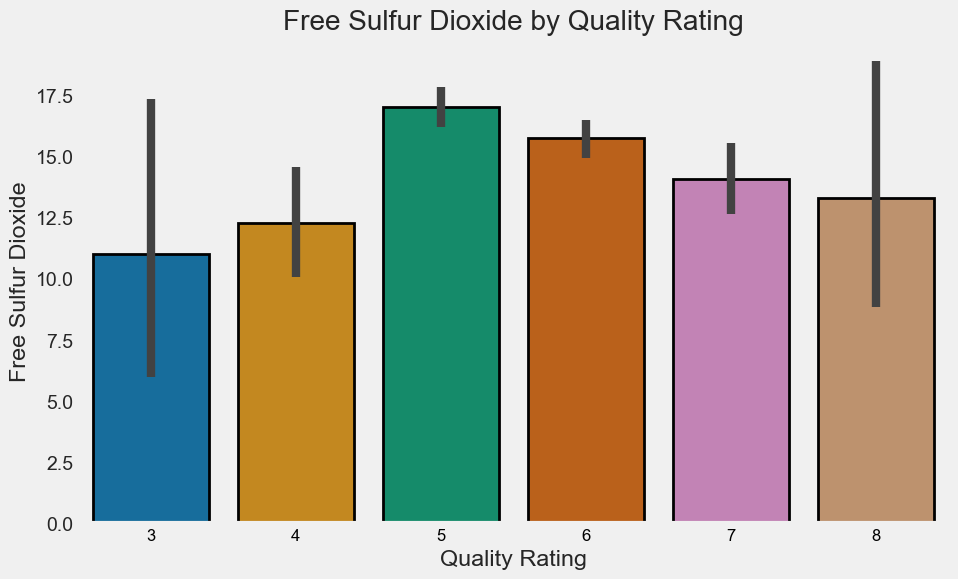

In [15]:
get_barplot(
    data = data, 
    x_column = 'quality', 
    y_column = 'free_sulfur_dioxide',
    x_label = 'Quality Rating',
    y_label = 'Free Sulfur Dioxide',
    title = 'Free Sulfur Dioxide by Quality Rating'
)

plt.show()

The bar graph shows that wines with a quality rating of 5 tend to have higher levels of sulfur dioxide. This could potentially be because these wines were not stored in optimal conditions. Improper storage can lead to an increase in sulfur dioxide levels, which may affect the wine's quality and taste.

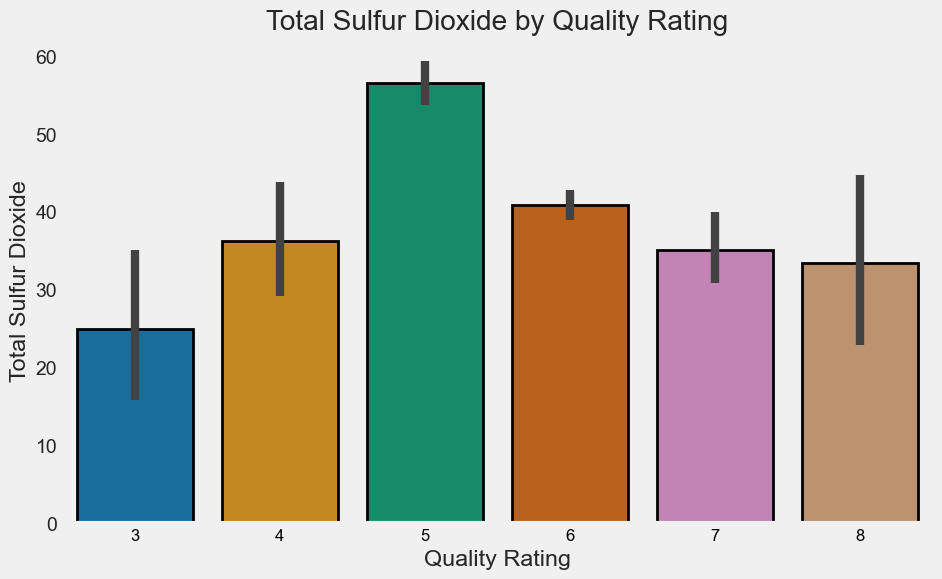

In [16]:
get_barplot(
    data = data, 
    x_column = 'quality', 
    y_column = 'total_sulfur_dioxide',
    x_label = 'Quality Rating',
    y_label = 'Total Sulfur Dioxide',
    title = 'Total Sulfur Dioxide by Quality Rating'
)

plt.show()

The bar graph shows that the density of the wine is distributed similarly across all quality ratings. This suggests that the density of the wine does not significantly influence or determine the quality rating assigned to the wine. 

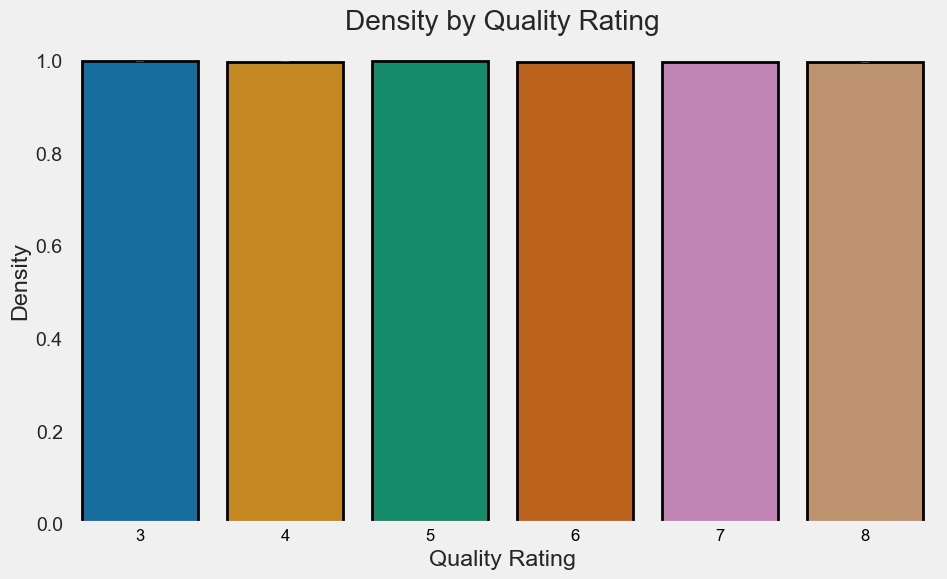

In [17]:
get_barplot(
    data = data, 
    x_column = 'quality', 
    y_column = 'density',
    x_label = 'Quality Rating',
    y_label = 'Density',
    title = 'Density by Quality Rating'
)

plt.show()

The bar graph shows that the pH of the wine is distributed similarly across all quality ratings. This suggests that the pH of the wine does not significantly influence or determine the quality rating assigned to the wine. 

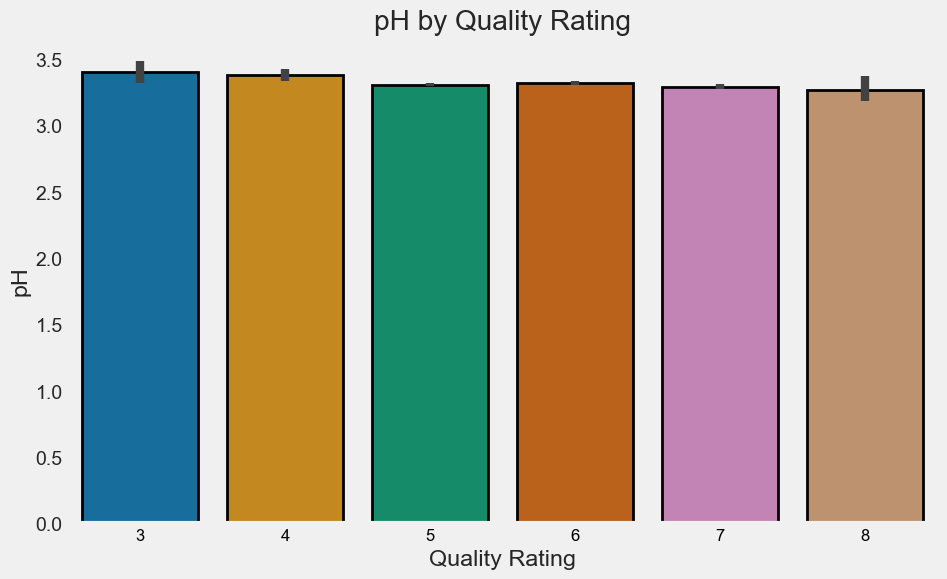

In [18]:
get_barplot(
    data = data, 
    x_column = 'quality', 
    y_column = 'pH',
    x_label = 'Quality Rating',
    y_label = 'pH',
    title = 'pH by Quality Rating'
)

plt.show()

The bar graph shows that wines with higher quality ratings tend to have higher levels of sulphates. This is a positive indicator because sulphates are commonly used as preservatives in winemaking. Preservatives help to extend the shelf life and maintain the quality of the wine over time. 

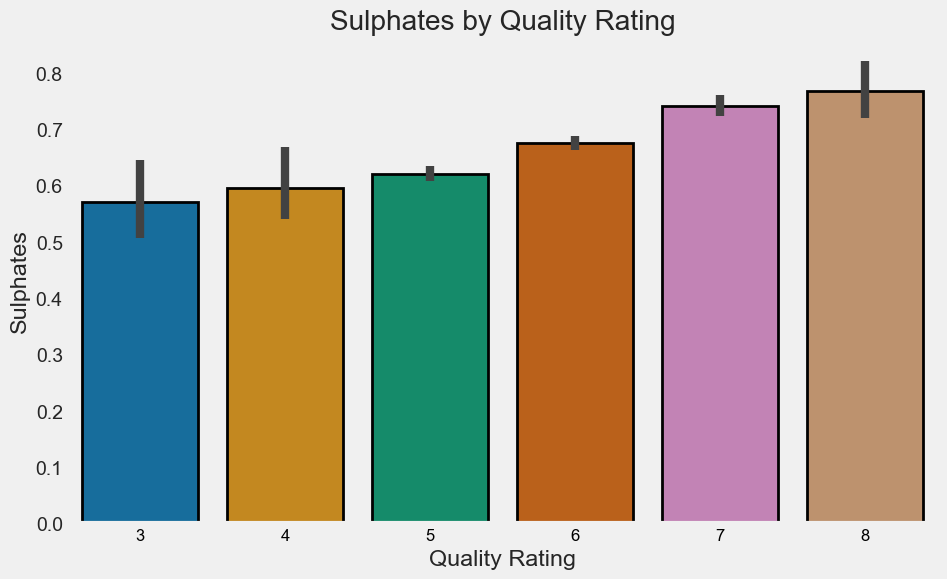

In [19]:
get_barplot(
    data = data, 
    x_column = 'quality', 
    y_column = 'sulphates',
    x_label = 'Quality Rating',
    y_label = 'Sulphates',
    title = 'Sulphates by Quality Rating'
)

plt.show()

The bar graph shows that wines with higher quality ratings tend to have a slightly higher alcohol content compared to wines with lower quality ratings.

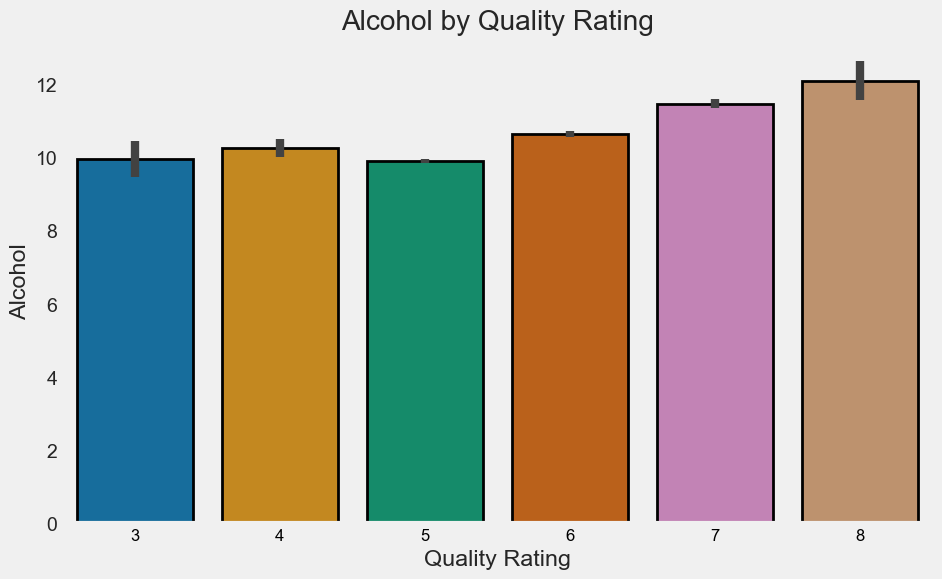

In [20]:
get_barplot(
    data = data, 
    x_column = 'quality', 
    y_column = 'alcohol',
    x_label = 'Quality Rating',
    y_label = 'Alcohol',
    title = 'Alcohol by Quality Rating'
)

plt.show()

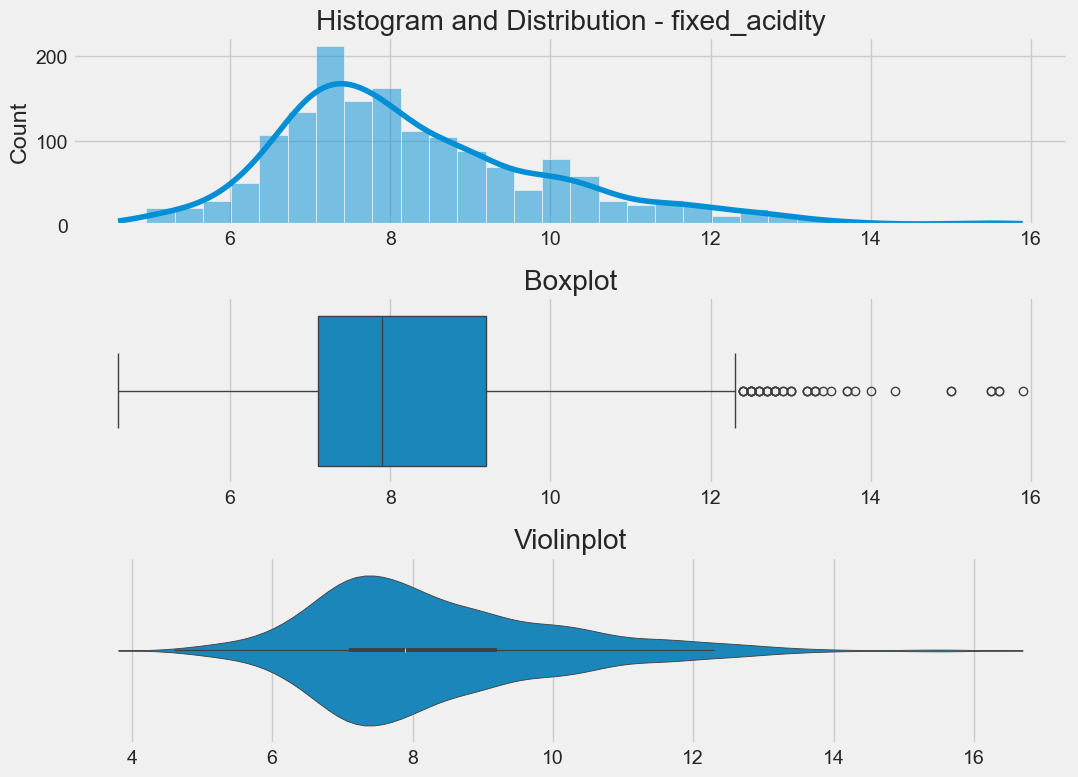

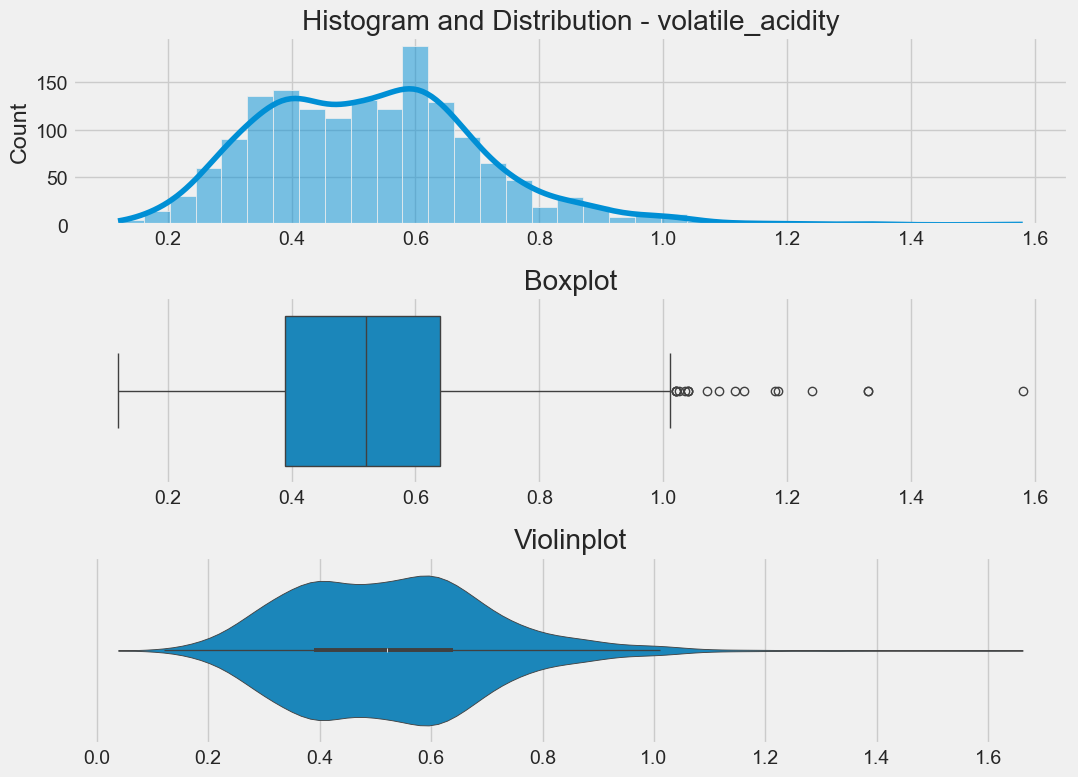

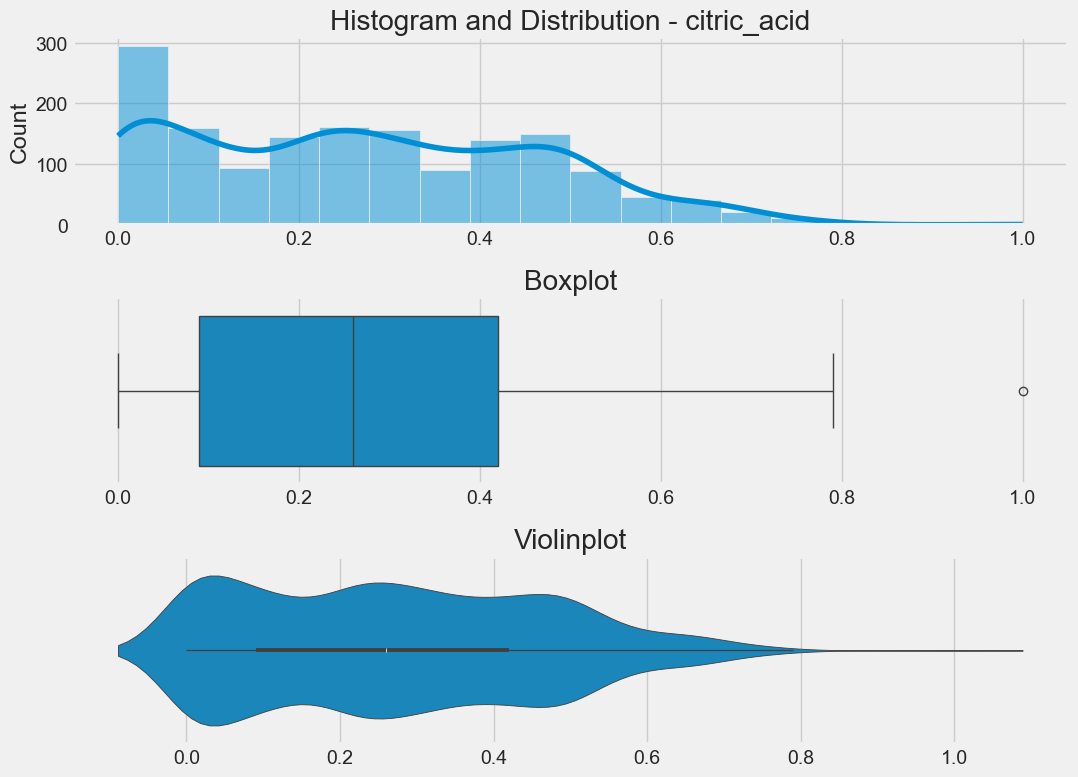

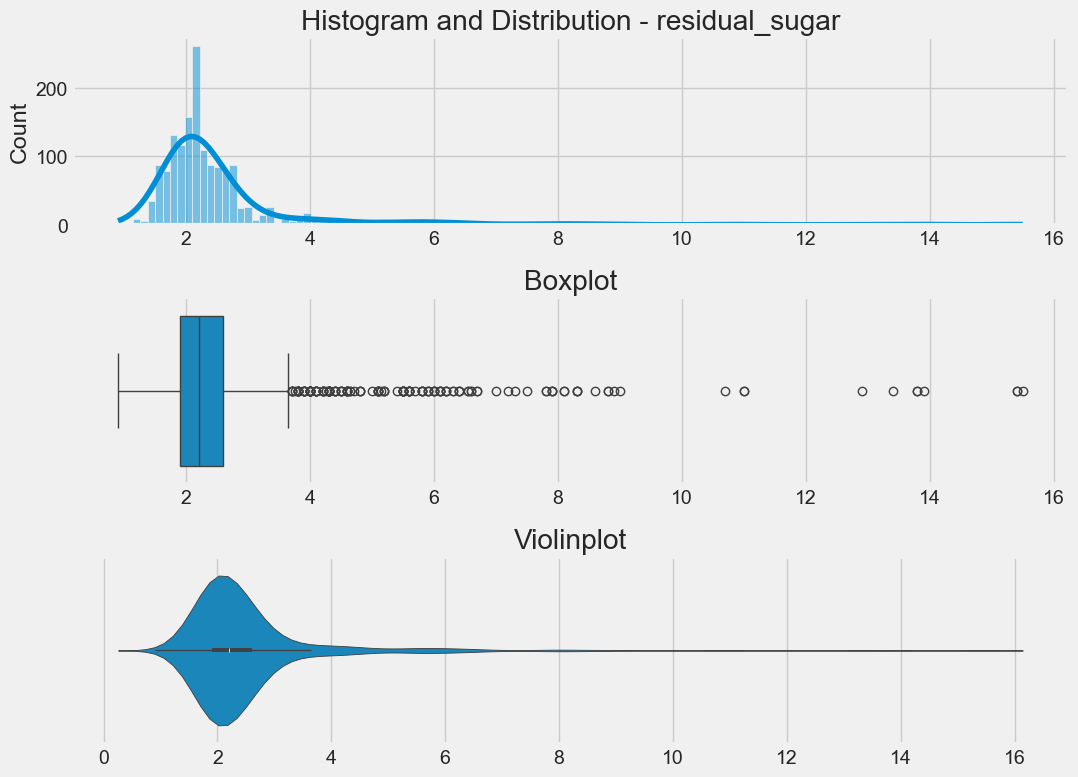

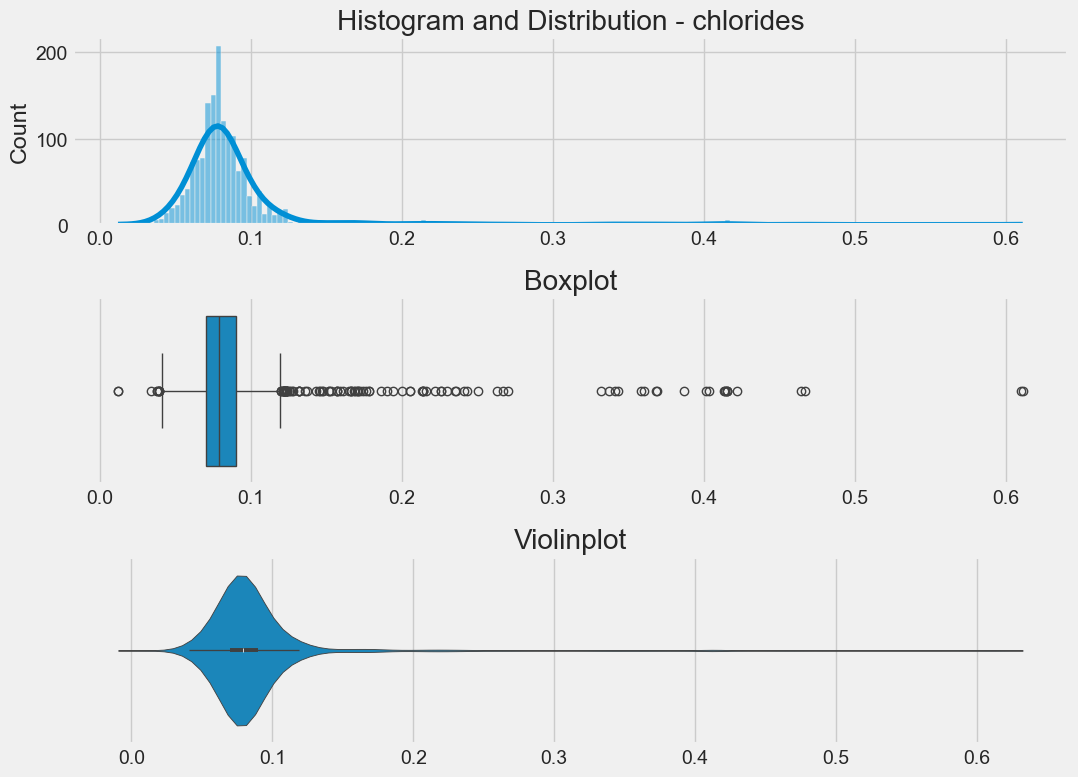

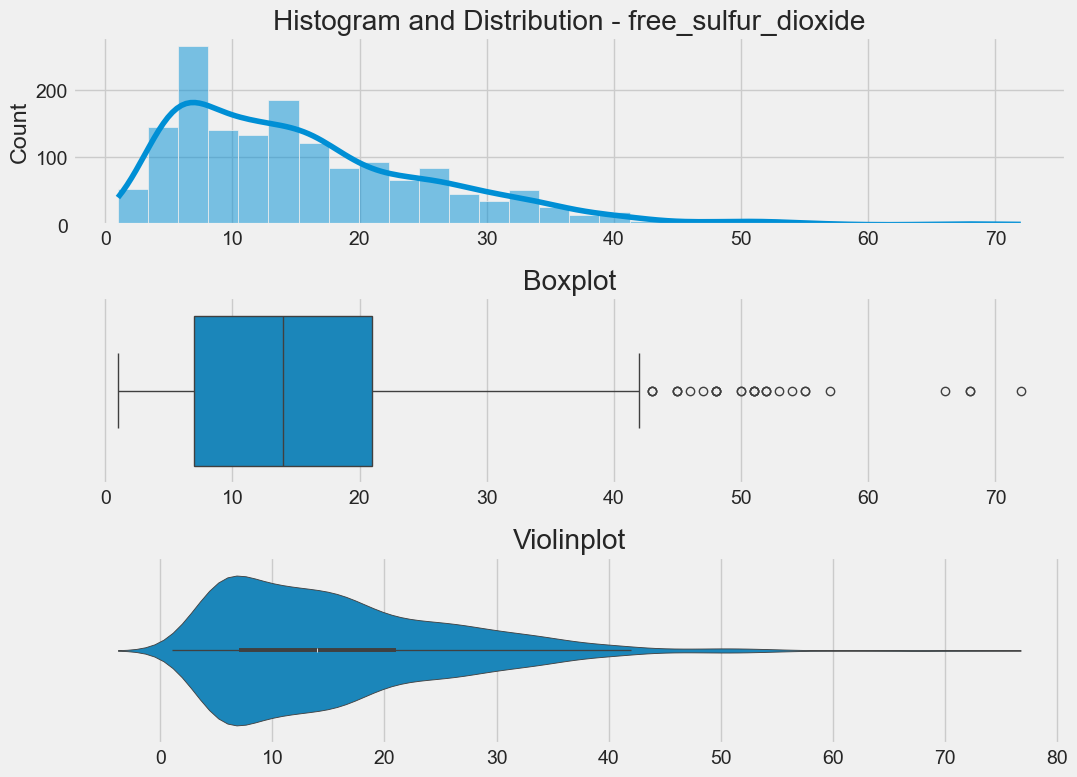

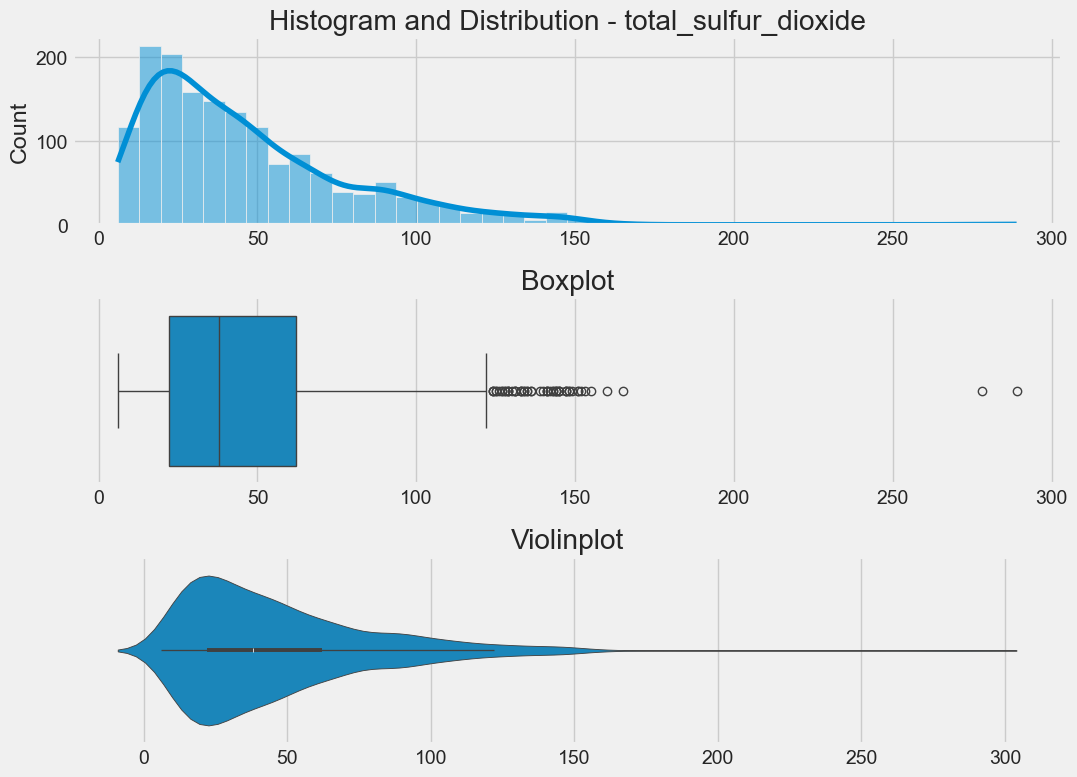

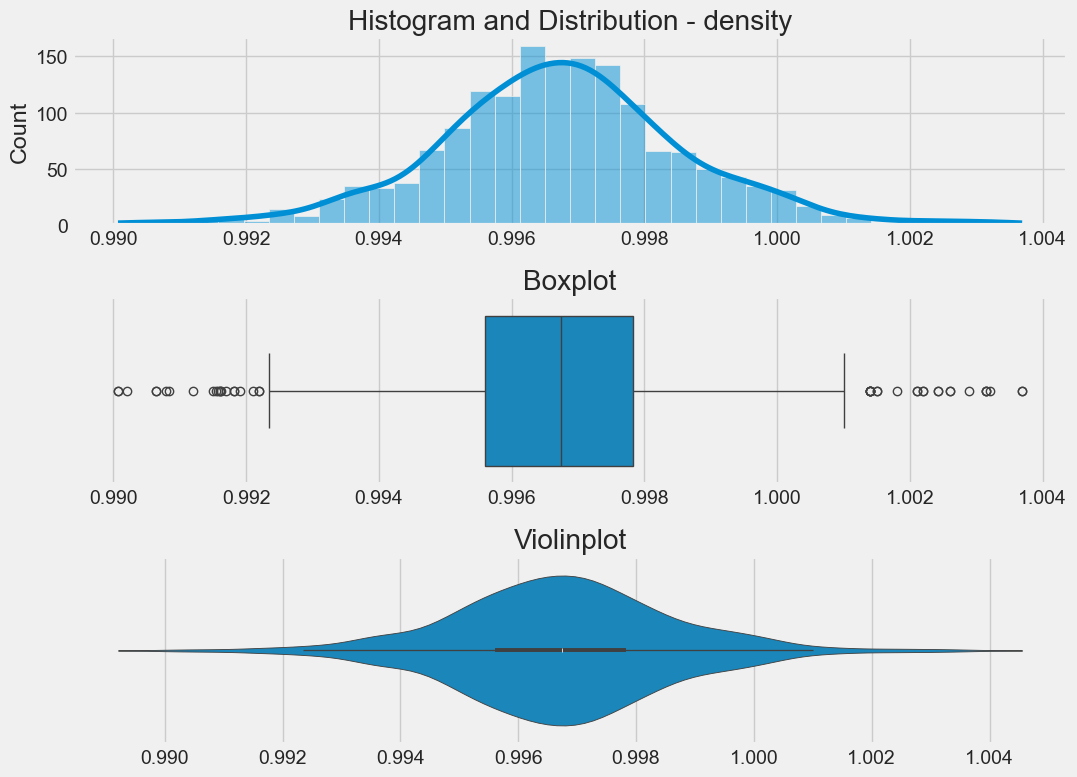

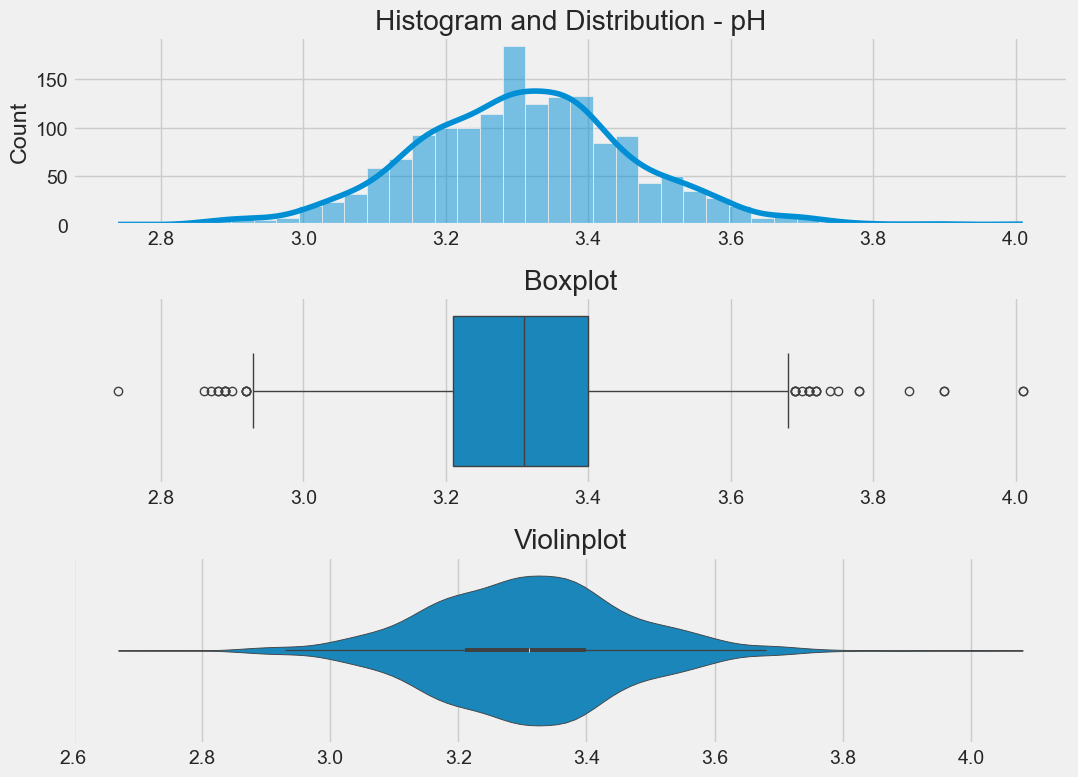

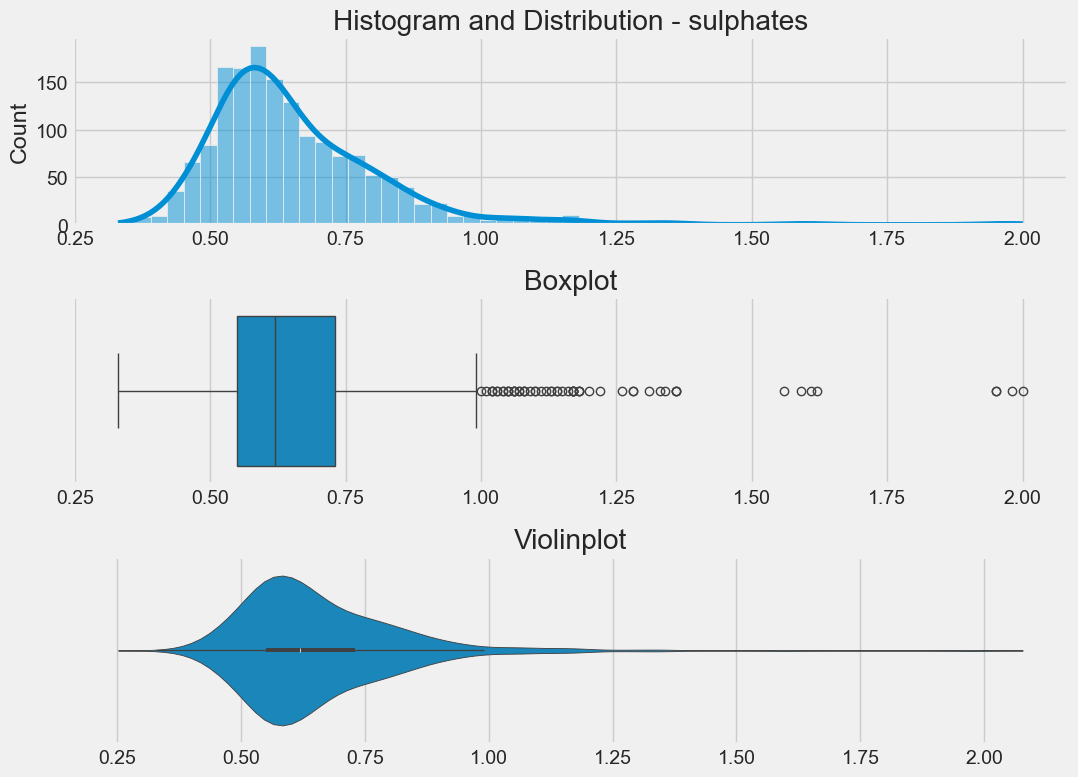

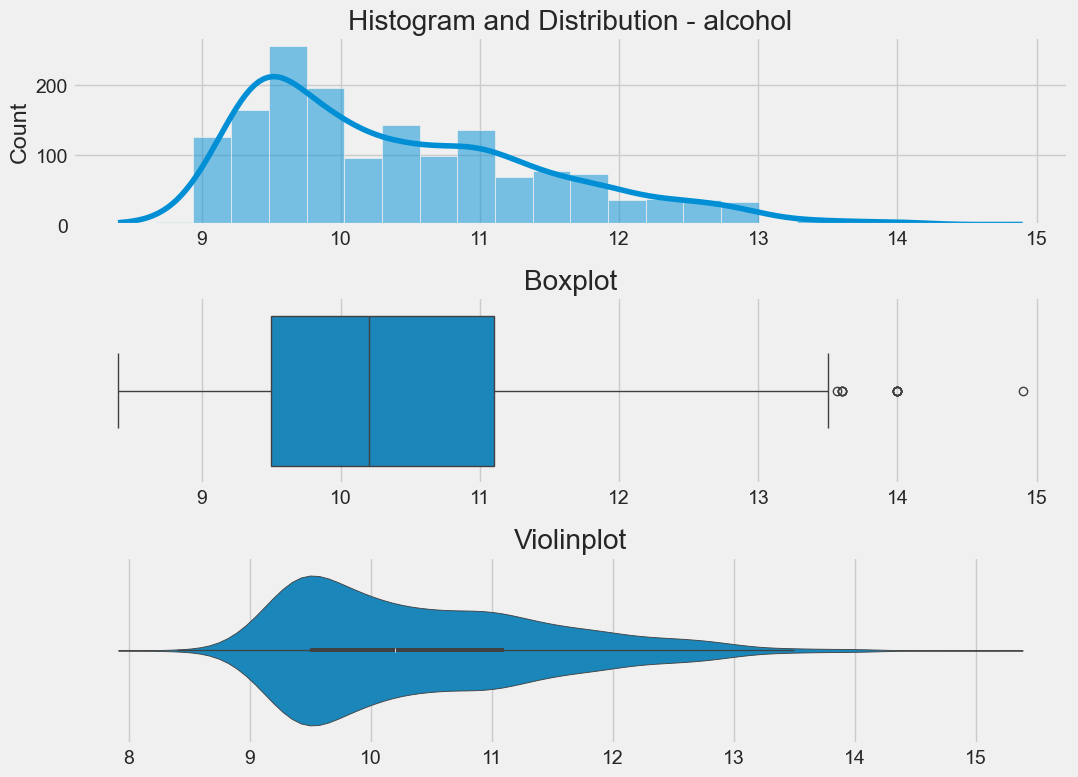

In [21]:
for column in data.columns[:-1]:
    get_numerical_plot(data = data, column_name = column)

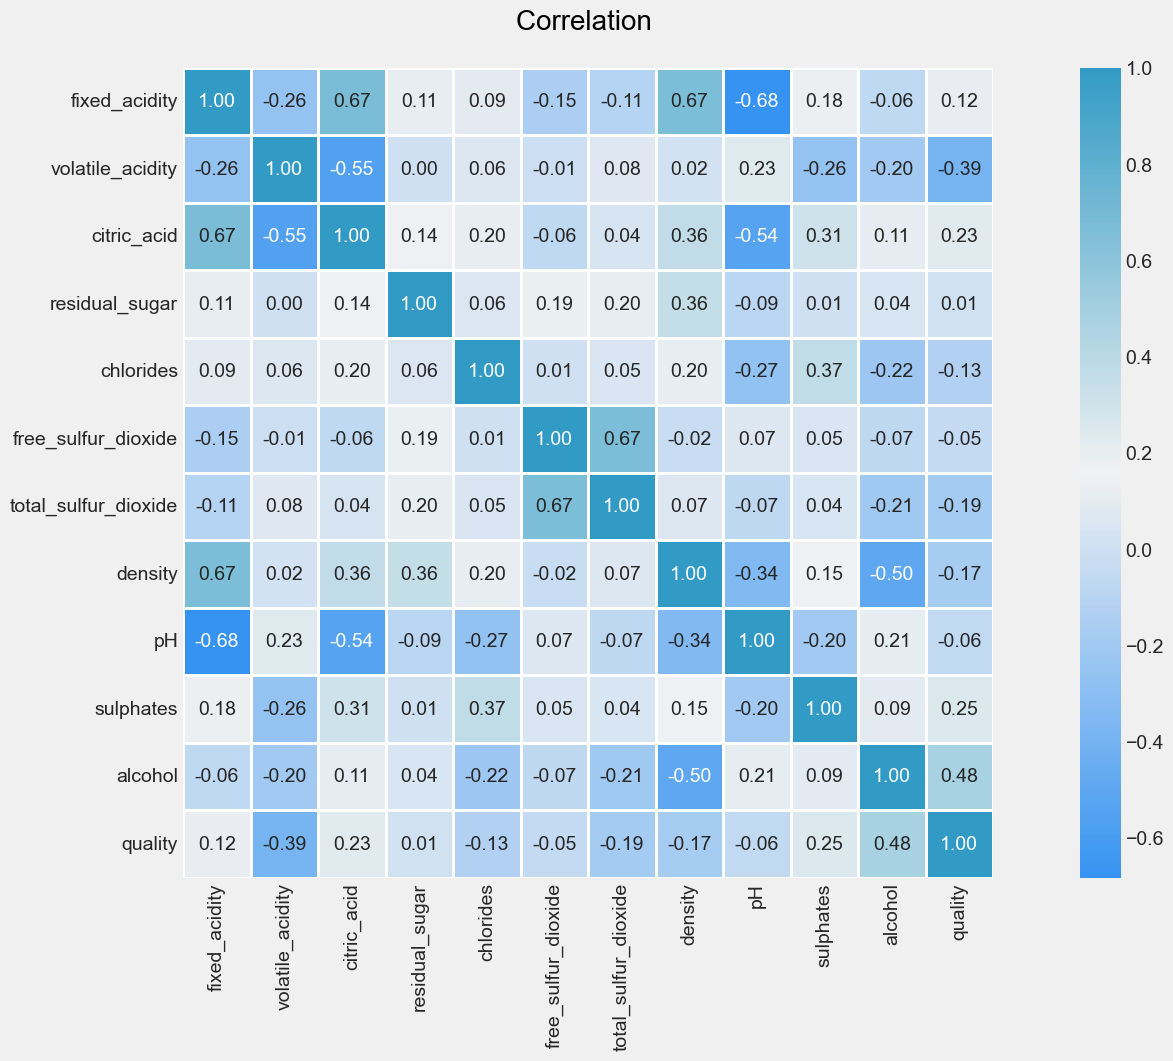

In [22]:
cmap = sns.diverging_palette(250, 230, 90, 60, as_cmap=True)
plt.figure(figsize = (20, 10))
sns.heatmap(data = data.corr(), annot = True, cmap = cmap, 
            linewidths = 2, square = True, 
            linecolor = 'White', fmt = '.2f')
plt.title('Correlation \n', fontdict = {'fontsize': 20,  
                                        'fontweight' : 'normal',
                                        'color' : 'black'})
plt.show()

## Preprocessing

In [23]:
RANDOM_STATE = 42

### Target Variable

In [24]:
data['quality'].value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

In [25]:
data['target'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)
data['target'].value_counts()

target
0    1382
1     217
Name: count, dtype: int64

### Train Test Split

In [26]:
X = data.drop(['quality', 'target'], axis=1)
y = data['target']

X.shape, y.shape

((1599, 11), (1599,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

### Sampling

In [28]:
y_train.value_counts()

target
0    1109
1     170
Name: count, dtype: int64

In [29]:
smote = SMOTE(random_state=RANDOM_STATE, sampling_strategy=0.5)
X_train_sam, y_train_sam = smote.fit_resample(X_train, y_train)
X_train_sam.shape, y_train_sam.shape

((1663, 11), (1663,))

In [30]:
y_train_sam.value_counts()

target
0    1109
1     554
Name: count, dtype: int64

## Creating Pipeline

In [31]:
numerical_columns = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

In [32]:
class DummyEstimator(BaseEstimator):
  def fit(self): pass
  def transform(self): pass
  def score(self): pass

In [33]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', 'passthrough')
])

preprocessor = ColumnTransformer(transformers=[('numerical', numerical_transformer, numerical_columns)])

In [34]:
estimators = [('preprocessor', preprocessor), ('clf', DummyEstimator())]
pipe = Pipeline(estimators)

In [35]:
param_grid = [
    {
        'preprocessor__numerical__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'clf': [LogisticRegression()],
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__solver': ['liblinear', 'lbfgs'],
        'clf__random_state': [RANDOM_STATE]
    },
    {
        'preprocessor__numerical__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'clf': [KNeighborsClassifier()],
        'clf__n_neighbors': [3, 5, 7, 9, 11],
        'clf__leaf_size': [10, 20, 30, 40, 50],
        'clf__weights': ['uniform', 'distance'],
    },
    {
        'preprocessor__numerical__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'clf': [DecisionTreeClassifier()],
        'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': [None, 5, 10, 15],
        'clf__min_samples_split': [2, 4, 6, 8],
        'clf__random_state': [RANDOM_STATE]
    },
    {
        'preprocessor__numerical__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 5, 10, 15],
        'clf__min_samples_split': [2, 5, 10],
        'clf__random_state': [RANDOM_STATE]
    },
    {
        'preprocessor__numerical__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'clf': [XGBClassifier()],
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 5, 10, 15],
        'clf__learning_rate': [0.01, 0.1, 1],
        'clf__random_state': [RANDOM_STATE]
    },
]

In [36]:
parametergrid = ParameterGrid(param_grid)
print(f'Total combinaions: {len(parametergrid)}')

Total combinaions: 486


## Model Training

In [37]:
%%time
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=RANDOM_STATE)
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=skf,
                           n_jobs=1, error_score='raise', verbose=2, return_train_score=True)
grid_search.fit(X_train_sam, y_train_sam)

Fitting 4 folds for each of 486 candidates, totalling 1944 fits
[CV] END clf=LogisticRegression(), clf__C=0.01, clf__random_state=42, clf__solver=liblinear, preprocessor__numerical__scaler=StandardScaler(); total time=   0.0s


[CV] END clf=LogisticRegression(), clf__C=0.01, clf__random_state=42, clf__solver=liblinear, preprocessor__numerical__scaler=StandardScaler(); total time=   0.0s
[CV] END clf=LogisticRegression(), clf__C=0.01, clf__random_state=42, clf__solver=liblinear, preprocessor__numerical__scaler=StandardScaler(); total time=   0.0s
[CV] END clf=LogisticRegression(), clf__C=0.01, clf__random_state=42, clf__solver=liblinear, preprocessor__numerical__scaler=StandardScaler(); total time=   0.0s
[CV] END clf=LogisticRegression(), clf__C=0.01, clf__random_state=42, clf__solver=liblinear, preprocessor__numerical__scaler=MinMaxScaler(); total time=   0.0s
[CV] END clf=LogisticRegression(), clf__C=0.01, clf__random_state=42, clf__solver=liblinear, preprocessor__numerical__scaler=MinMaxScaler(); total time=   0.0s
[CV] END clf=LogisticRegression(), clf__C=0.01, clf__random_state=42, clf__solver=liblinear, preprocessor__numerical__scaler=MinMaxScaler(); total time=   0.0s
[CV] END clf=LogisticRegression(),

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          'passthrough')]),
                                                                         ['fixed_acidity',
                                                                          'volatile_acidity',
                                                                          'citric_acid',
                                                                          'residual_sugar',
                                                                          'chlorides',
                                                                          'free_sulfur_dioxide...
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...)],
                          'clf__learning_rate': [0.01, 0.1, 1],
                          'clf__max_depth': [None, 5, 10, 15],
                          'clf__n_estimators': [50, 100, 200],
                          'clf__random_state': [42],
                          'preprocessor__numerical__scaler': [StandardScaler(),
                                                              MinMaxScaler(),
                                                              RobustScaler()]}],
             return_train_score=True, verbose=2)

In [130]:
print(f'Best parameters: {grid_search.best_score_}')

Best parameters: 0.9170325532900834


In [128]:
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'clf': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...), 'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 200, 'clf__random_state': 42, 'preprocessor__numerical__scaler': StandardScaler()}


## Saving Model

In [129]:
joblib.dump(grid_search.best_estimator_, filename="wine_prediction_model.joblib")

['wine_prediction_model.joblib']